In [18]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline 

In [2]:
# I read the data file.

flights = pd.read_csv("BOS_CUN_trips1M.csv",)

flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1


In [5]:
'''I want to now look at the column with return dates i.e. departure_odate.
I then want to convert that into a day of the week.''' 

flights['departure_odate'] = pd.to_datetime(flights['departure_odate'])
flights['day_of_week_dep'] = flights['departure_odate'].dt.dayofweek

days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

flights['day_of_week_dep'] = flights['day_of_week_dep'].apply(lambda x: days[x])

flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns,day_of_week_dep
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri


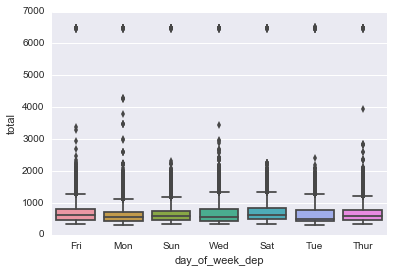

In [6]:
# I create quick visualisations to see the price spread.

sns.boxplot(flights['day_of_week_dep'], flights['total'])


In [10]:
# I can now group the table by the day of the week departure and find mean prices for each day of the week to depart.


grouped = flights.groupby('day_of_week_dep').mean()

groupeddf = pd.DataFrame(grouped['total'])
groupeddf.sort_values('total')

# As expected, the most expensive days to travel are Friday and Saturday. The cheapest are Tuesday and Monday.

,total
day_of_week_dep,
Tue,626.971564
Mon,627.900513
Sun,651.500564
Thur,673.033312
Wed,677.623847
Fri,685.179145
Sat,707.917809


In [11]:
# I now do the same thing for the return day of the week.

flights['return_ddate'] = pd.to_datetime(flights['return_ddate'])
flights['day_of_week_ret'] = flights['return_ddate'].dt.dayofweek

days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

flights['day_of_week_ret'] = flights['day_of_week_ret'].apply(lambda x: days[x])

flights.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,...,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns,day_of_week_dep,day_of_week_ret
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,...,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri,Sat
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri,Sat
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,...,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri,Sat
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,...,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri,Sat
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,...,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1,Fri,Sat


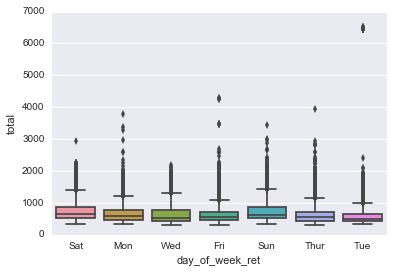

In [12]:
# Again, I do a quick visualisation.

sns.boxplot(flights['day_of_week_ret'], flights['total'])

In [13]:
# Similar to above, I group the table by the day of the week return and find mean prices.

grouped2 = flights.groupby('day_of_week_ret').mean()
groupeddf2 = pd.DataFrame(grouped2['total'])
groupeddf2.sort_values('total')

# Again, the cheapest day of the week to return is Tuesday and 2nd is Saturday.
# Most expensive days to return are Sunday (unsurprising) and Saturday.

,total
day_of_week_ret,
Tue,587.906721
Fri,618.192966
Thur,635.998165
Mon,649.161847
Wed,651.201279
Sat,724.506405
Sun,735.317349


In [15]:
# I now group the table by both departure day of the week and return day of the week.

grouped3 = flights.groupby(['day_of_week_dep', 'day_of_week_ret']).mean()
grouped3df = pd.DataFrame(grouped3['total'])
grouped3df

total
day_of_week_dep day_of_week_ret            
Fri             Fri              648.313314
                Mon              671.862519
                Sat              783.742975
                Sun              703.458688
                Thur             669.397004
                Tue              612.570156
                Wed              754.278957
Mon             Fri              590.641378
                Mon              601.709979
                Sat              644.547527
                Sun              710.861894
                Thur             609.977553
                Tue              559.276708
                Wed              707.557244
Sat             Fri              664.001598
                Mon              678.835879
                Sat              731.627285
                Sun              686.599597
                Thur             638.343448
                Tue              583.994101
                Wed              689.127320
Sun             Fri              575.593330
                Mon              664.462996
                Sat              668.789391
                Sun              719.301648
                Thur             578.913307
                Tue              562.964301
                Wed              565.540041
Thur            Fri              640.614428
                Mon              669.787813
                Sat              702.324744
                Sun              734.055653
                Thur             672.078664
                Tue              630.974115
                Wed              669.317431
Tue             Fri              521.283394
                Mon              571.833854
                Sat              705.563544
                Sun              729.692373
                Thur             617.574370
                Tue              531.764000
                Wed              728.836896
Wed             Fri              575.008254
                Mon              683.745347
                Sat              798.385233
                Sun              834.310144
                Thur             585.582222
                Tue              632.317329
                Wed              551.575495

In [16]:
# Now I want to sort the values and get the cheapest departure day of week and return day of week combinations

grouped3df.sort_values('total')

total
day_of_week_dep day_of_week_ret            
Tue             Fri              521.283394
                Tue              531.764000
Wed             Wed              551.575495
Mon             Tue              559.276708
Sun             Tue              562.964301
                Wed              565.540041
Tue             Mon              571.833854
Wed             Fri              575.008254
Sun             Fri              575.593330
                Thur             578.913307
Sat             Tue              583.994101
Wed             Thur             585.582222
Mon             Fri              590.641378
                Mon              601.709979
                Thur             609.977553
Fri             Tue              612.570156
Tue             Thur             617.574370
Thur            Tue              630.974115
Wed             Tue              632.317329
Sat             Thur             638.343448
Thur            Fri              640.614428
Mon             Sat              644.547527
Fri             Fri              648.313314
Sat             Fri              664.001598
Sun             Mon              664.462996
                Sat              668.789391
Thur            Wed              669.317431
Fri             Thur             669.397004
Thur            Mon              669.787813
Fri             Mon              671.862519
Thur            Thur             672.078664
Sat             Mon              678.835879
Wed             Mon              683.745347
Sat             Sun              686.599597
                Wed              689.127320
Thur            Sat              702.324744
Fri             Sun              703.458688
Tue             Sat              705.563544
Mon             Wed              707.557244
                Sun              710.861894
Sun             Sun              719.301648
Tue             Wed              728.836896
                Sun              729.692373
Sat             Sat              731.627285
Thur            Sun              734.055653
Fri             Wed              754.278957
                Sat              783.742975
Wed             Sat              798.385233
                Sun              834.310144

In [26]:
# Now I want to create a pivot table with the data.

grouped3df.to_csv("grouped3df.csv")

grouped3df = pd.read_csv("grouped3df.csv")

grouped3df = grouped3df[['day_of_week_dep', 'day_of_week_ret', 'total']]

#grouped3df

pivot_table = grouped3df.pivot('day_of_week_dep', 'day_of_week_ret', 'total')

pivot_table

day_of_week_ret,Fri,Mon,Sat,Sun,Thur,Tue,Wed
day_of_week_dep,,,,,,,
Fri,648.313314,671.862519,783.742975,703.458688,669.397004,612.570156,754.278957
Mon,590.641378,601.709979,644.547527,710.861894,609.977553,559.276708,707.557244
Sat,664.001598,678.835879,731.627285,686.599597,638.343448,583.994101,689.127320
Sun,575.593330,664.462996,668.789391,719.301648,578.913307,562.964301,565.540041
Thur,640.614428,669.787813,702.324744,734.055653,672.078664,630.974115,669.317431
Tue,521.283394,571.833854,705.563544,729.692373,617.574370,531.764000,728.836896
Wed,575.008254,683.745347,798.385233,834.310144,585.582222,632.317329,551.575495


In [31]:
# I want to re-order the columns so they start with Monday and finish with Sunday.

pivot_table = pivot_table[['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']]

pivot_table

day_of_week_ret,Mon,Tue,Wed,Thur,Fri,Sat,Sun
day_of_week_dep,,,,,,,
Fri,671.862519,612.570156,754.278957,669.397004,648.313314,783.742975,703.458688
Mon,601.709979,559.276708,707.557244,609.977553,590.641378,644.547527,710.861894
Sat,678.835879,583.994101,689.127320,638.343448,664.001598,731.627285,686.599597
Sun,664.462996,562.964301,565.540041,578.913307,575.593330,668.789391,719.301648
Thur,669.787813,630.974115,669.317431,672.078664,640.614428,702.324744,734.055653
Tue,571.833854,531.764000,728.836896,617.574370,521.283394,705.563544,729.692373
Wed,683.745347,632.317329,551.575495,585.582222,575.008254,798.385233,834.310144


In [35]:
# I have to do the same for the rows.

pivot_table = pivot_table.reindex(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

pivot_table

day_of_week_ret,Mon,Tue,Wed,Thur,Fri,Sat,Sun
day_of_week_dep,,,,,,,
Mon,601.709979,559.276708,707.557244,609.977553,590.641378,644.547527,710.861894
Tue,571.833854,531.764000,728.836896,617.574370,521.283394,705.563544,729.692373
Wed,683.745347,632.317329,551.575495,585.582222,575.008254,798.385233,834.310144
Thur,669.787813,630.974115,669.317431,672.078664,640.614428,702.324744,734.055653
Fri,671.862519,612.570156,754.278957,669.397004,648.313314,783.742975,703.458688
Sat,678.835879,583.994101,689.127320,638.343448,664.001598,731.627285,686.599597
Sun,664.462996,562.964301,565.540041,578.913307,575.593330,668.789391,719.301648


In [36]:
# I can now export the table so I can insert it into the article.

pivot_table.to_csv("dayofweektotravel.csv")